In [1]:
import pandas as pd
import env
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import wrangle
pd.set_option('display.max_columns', None)

# Acquire

In [2]:
df = wrangle.new_zillow_data()

# Prepare

In [3]:
df.shape

(52319, 68)

In [4]:
list(df.columns)

['id',
 'parcelid',
 'airconditioningtypeid',
 'architecturalstyletypeid',
 'basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'buildingclasstypeid',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'decktypeid',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fips',
 'fireplacecnt',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'hashottuborspa',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolcnt',
 'poolsizesum',
 'pooltypeid10',
 'pooltypeid2',
 'pooltypeid7',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'propertyzoningdesc',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'storytypeid',
 'threequarterbathnbr',
 'typeconstructiontypeid',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',


In [5]:
wrangle.null_counter(df).T

name,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
num_rows_missing,0,0,38704,52249,52272,0,0,52319,18665,135,51930,47948,81,246,52319,52319,47948,52154,0,45086,135,34335,34335,50805,18470,0,0,366,41242,51454,51876,51248,42329,0,0,18558,0,1036,0,33338,26,0,52272,45602,52243,18558,50384,52256,114,37787,52238,82,1,0,1,4,50251,50251,121,0,0,38704,52249,52319,18470,0,52272,52243
pct_rows_missing,0.0,0.0,0.739769,0.998662,0.999102,0.0,0.0,1.0,0.356754,0.00258,0.992565,0.916455,0.001548,0.004702,1.0,1.0,0.916455,0.996846,0.0,0.861752,0.00258,0.656263,0.656263,0.971062,0.353027,0.0,0.0,0.006996,0.78828,0.983467,0.991533,0.979529,0.809056,0.0,0.0,0.354709,0.0,0.019802,0.0,0.637206,0.000497,0.0,0.999102,0.871615,0.998547,0.354709,0.963015,0.998796,0.002179,0.722242,0.998452,0.001567,0.000019,0.0,0.000019,0.000076,0.960473,0.960473,0.002313,0.0,0.0,0.739769,0.998662,1.0,0.353027,0.0,0.999102,0.998547


In [6]:
df = wrangle.null_dropper(df, 0.75, 0.75)

In [7]:
df.shape

(52317, 29)

In [8]:
list(df.columns)

['id',
 'parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror',
 'transactiondate',
 'propertylandusedesc']

In [9]:
df.isna().sum()

id                                 0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                133
calculatedfinishedsquarefeet      79
finishedsquarefeet12             244
fips                               0
fullbathcnt                      133
latitude                           0
longitude                          0
lotsizesquarefeet                364
propertycountylandusecode          0
propertylandusetypeid              0
rawcensustractandblock             0
regionidcity                    1034
regionidcounty                     0
regionidzip                       24
roomcnt                            0
yearbuilt                        112
structuretaxvaluedollarcnt        80
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              119
logerror                           0
t

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

id                              0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
propertylandusedesc             0
dtype: int64

In [12]:
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,261.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,261.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,261.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,261.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,261.0,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential


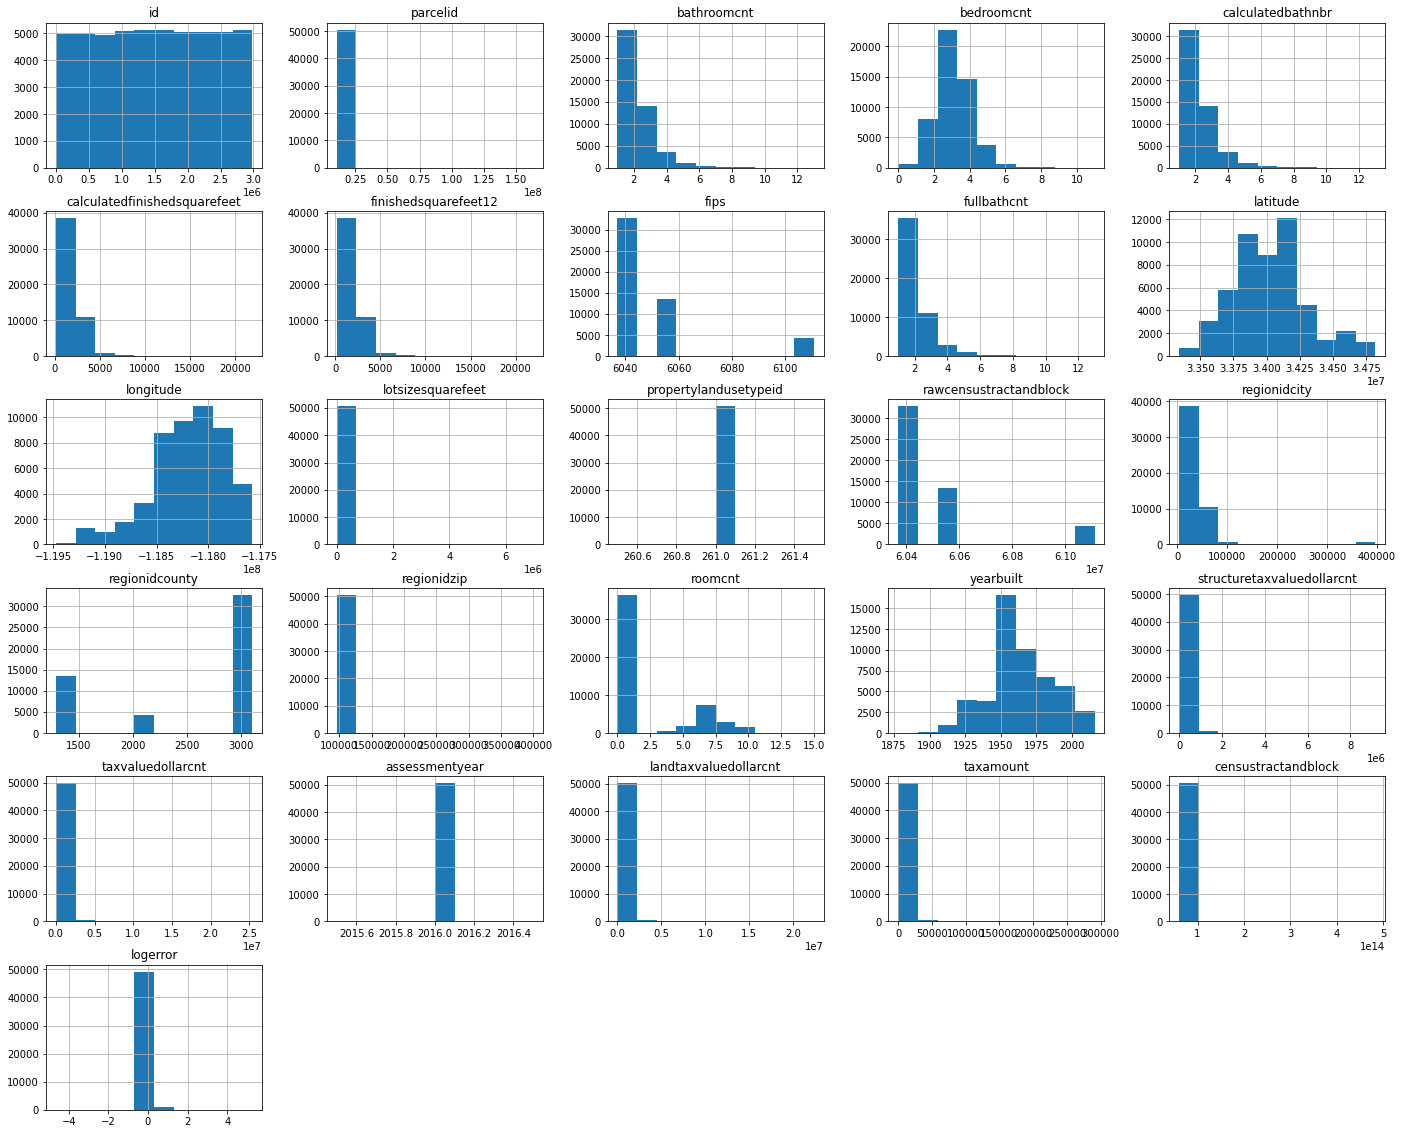

In [13]:
df.hist(figsize=(24, 20))
plt.show()

Redundant:
- finishedsqaurefeet12
- roomcnt
- censustractandblock
- landtaxvaluedollarcnt
- taxamount
- structuretaxvaluedollarcnt
- propertycountylandusecode

In [14]:
df = df.drop(columns=['finishedsquarefeet12', 'roomcnt', 'censustractandblock', 'landtaxvaluedollarcnt', 'taxamount', 'structuretaxvaluedollarcnt', 'propertycountylandusecode'])

In [32]:
df= df.drop(columns=['propertylandusetypeid'])

In [28]:
# Not necessary because I know these are all Single Family Residential
df = df.drop(columns=['propertylandusedesc'])

In [33]:
df.shape

(50559, 20)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50559 entries, 0 to 52318
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            50559 non-null  int64  
 1   parcelid                      50559 non-null  int64  
 2   bathroomcnt                   50559 non-null  float64
 3   bedroomcnt                    50559 non-null  float64
 4   calculatedfinishedsquarefeet  50559 non-null  float64
 5   fips                          50559 non-null  float64
 6   fullbathcnt                   50559 non-null  float64
 7   latitude                      50559 non-null  float64
 8   longitude                     50559 non-null  float64
 9   lotsizesquarefeet             50559 non-null  float64
 10  rawcensustractandblock        50559 non-null  float64
 11  regionidcity                  50559 non-null  float64
 12  regionidcounty                50559 non-null  float64
 13  r

In [17]:
# dropping this column since we have bathroomcnt, fullbathcnt, and I will make a half bath column
df = df.drop(columns=['calculatedbathnbr'])

In [31]:
df.shape

(50559, 21)

In [19]:
# creating a new column showing the number of half baths a house has
df['half_bath'] = (df.bathroomcnt - df.fullbathcnt)/0.5

In [20]:
df.half_bath

0        1.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
52314    0.0
52315    0.0
52316    0.0
52317    0.0
52318    0.0
Name: half_bath, Length: 50559, dtype: float64

In [21]:
df.half_bath.value_counts()

0.0    43998
1.0     6484
2.0       68
3.0        8
7.0        1
Name: half_bath, dtype: int64

In [28]:
df.regionidcounty.value_counts()

3101.0    32739
1286.0    13500
2061.0     4320
Name: regionidcounty, dtype: int64

In [23]:
df.transactiondate.value_counts()

2017-06-30    779
2017-04-28    591
2017-05-31    549
2017-07-28    526
2017-08-31    514
             ... 
2017-05-07      1
2017-05-13      1
2017-05-20      1
2017-06-11      1
2017-09-25      1
Name: transactiondate, Length: 257, dtype: int64

In [36]:
df.rename(columns={'bedroomcnt':'bed', 'bathroomcnt':'bath', 'calculatedfinishedsquarefeet':'square_feet', 'fips':'county', 'lotsizesquarefeet':'lot_square_feet', 'regionidcity':'id_city', 'regionidcounty':'id_county', 'regionidzip':'id_zip', 'taxvaluedollarcnt':'appraisal'}, inplace = True)

In [50]:
df['county'].replace({6037.0: 'LA County', 6059.0: 'Orange County',
               6111.0: 'Ventura County'}, inplace=True)

In [51]:
df.columns

Index(['id', 'parcelid', 'bath', 'bed', 'square_feet', 'county', 'fullbathcnt',
       'latitude', 'longitude', 'lot_square_feet', 'rawcensustractandblock',
       'id_city', 'id_county', 'id_zip', 'yearbuilt', 'appraisal',
       'assessmentyear', 'logerror', 'transactiondate', 'half_bath'],
      dtype='object')

## Split

In [52]:
train, valid_test = train_test_split(df, test_size = 0.3, random_state = 123)

validate, test = train_test_split(valid_test, test_size = 0.5, random_state = 123)

In [53]:
print(train.shape, validate.shape, test.shape)

(35391, 20) (7584, 20) (7584, 20)


In [54]:
train.head(3)

,id,parcelid,bath,bed,square_feet,county,fullbathcnt,latitude,longitude,lot_square_feet,rawcensustractandblock,id_city,id_county,id_zip,yearbuilt,appraisal,assessmentyear,logerror,transactiondate,half_bath
12591,1151696,11281694,3.0,4.0,2338.0,LA County,3.0,34661359.0,-118159914.0,10152.0,6.037901e+07,5534.0,3101.0,97317.0,1969.0,214525.0,2016.0,0.084755,2017-03-21,0.0
2778,2104743,10847031,7.0,4.0,12039.0,LA County,7.0,34167197.0,-118434181.0,37630.0,6.037129e+07,12447.0,3101.0,96410.0,1992.0,3794515.0,2016.0,0.031378,2017-01-19,0.0
30932,1861487,14230822,2.0,3.0,1472.0,Orange County,2.0,33805416.0,-117827119.0,6200.0,6.059076e+07,33252.0,1286.0,97065.0,1960.0,488429.0,2016.0,-0.024276,2017-06-13,0.0


# Evaluate

### 1. How does log error compare between the three counties?

<AxesSubplot:>

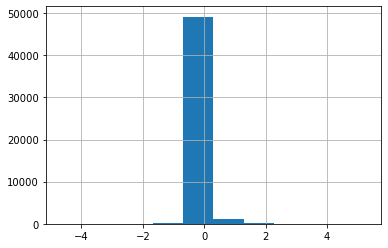

In [47]:
df.logerror.hist()

<AxesSubplot:>

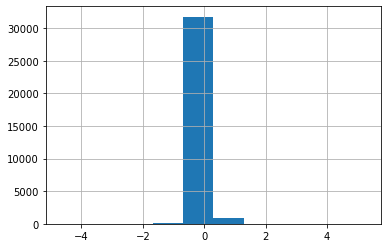

In [57]:
df.logerror[df.county == 'LA County'].hist()

<AxesSubplot:>

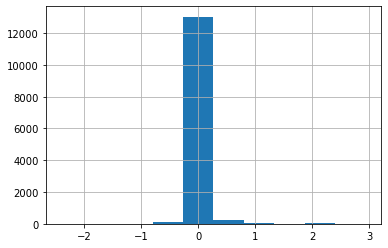

In [58]:
df.logerror[df.county == 'Orange County'].hist()

<AxesSubplot:>

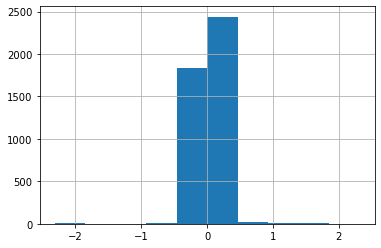

In [59]:
df.logerror[df.county == 'Ventura County'].hist()

It appears that the range of log error is more broad for Ventura County, i.e. The errors are larger in this county. 

In [66]:
avg_LA_logerror = df.logerror[df.county == 'LA County'].mean()
avg_Orange_logerror = df.logerror[df.county == 'Orange County'].mean()
avg_Ventura_logerror = df.logerror[df.county == 'Ventura County'].mean()

In [68]:
y = [avg_LA_logerror, avg_Orange_logerror, avg_Ventura_logerror]

In [69]:
x = ['LA County', 'Orange County', 'Ventura County']

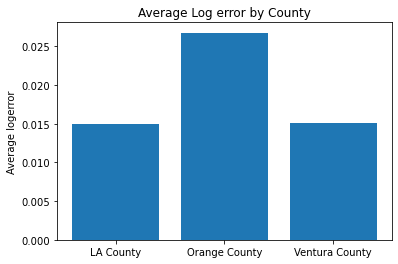

In [71]:
plt.bar(x, y)
plt.ylabel('Average logerror')
plt.title('Average Log error by County')
plt.show()

This chart shows that the average logerror is larger in Orange County. 

### Null Hypothesis:
- There is no significant difference between the county's logerrors.

### Alternative Hypothesis
- There is a statistically significant difference between the county's logerrors. 

In [73]:
# I am performing an ANOVA statistical test to see the significance of this chart.
from scipy import stats
alpha = 0.05

f, p = stats.f_oneway(df[df['county'] == 'LA County'].logerror,
                     df[df['county'] == 'Orange County'].logerror,
                     df[df['county'] == 'Ventura County'].logerror)

f, p

(22.529040531309715, 1.660043739931129e-10)

I reject the Null Hypothesis. 

### 2. How does size of a house affect logerror?

df.square_feet.hist()

In [85]:
y=[df.logerror[df.square_feet < 2500].mean(),
df.logerror[(df.square_feet >= 2500) & (df.square_feet < 5000)].mean(),
df.logerror[df.square_feet >= 5000].mean()]

In [86]:
x=['smedium', 'large', 'xl']

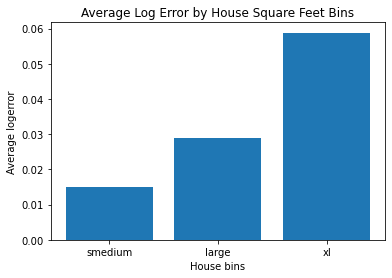

In [87]:
plt.bar(x, y)
plt.xlabel('House bins')
plt.ylabel('Average logerror')
plt.title('Average Log Error by House Square Feet Bins')
plt.show()

It appears that as the square footage of a house increases, so too does the average logerror. Interesting. 

### Null Hypothesis:
- There is no significant difference between the logerrors according to house square footage.

### Alternative Hypothesis
- There is a statistically significant difference between the logerrors according to house square footage. 

In [88]:
# I am performing an ANOVA statistical test to see the significance of this chart.
from scipy import stats
alpha = 0.05

f, p = stats.f_oneway(df[df['square_feet'] < 2500].logerror,
                     df[(df['square_feet'] >= 2500) & (df['square_feet'] < 5000)].logerror,
                     df[df['square_feet'] >= 5000].logerror)

f, p

(44.00700236584575, 8.028208895897534e-20)

I reject the Null Hypothesis.

 ### 3. How does year built affect logerror?

<AxesSubplot:>

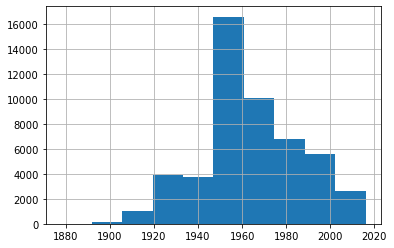

In [89]:
df.yearbuilt.hist()

In [90]:
y=[df.logerror[df.yearbuilt < 1950].mean(),
df.logerror[(df.yearbuilt >= 1950) & (df.square_feet < 1980)].mean(),
df.logerror[df.yearbuilt >= 1980].mean()]

In [93]:
x = ['Before 1950', '1950-1979', '1980-Present']

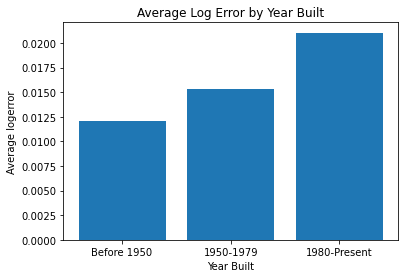

In [94]:
plt.bar(x, y)
plt.xlabel('Year Built')
plt.ylabel('Average logerror')
plt.title('Average Log Error by Year Built')
plt.show()

Interestingly, it appears that the older houses have a smaller logerror on average. I would have predicted it to be the other way around. 

### Null Hypothesis:
- There is no significant difference between the logerrors according to year built. 

### Alternative Hypothesis
- There is a statistically significant difference between the logerrors according to year built.

In [95]:
# I am performing an ANOVA statistical test to see the significance of this chart.
alpha = 0.05

f, p = stats.f_oneway(df[df['yearbuilt'] < 1950].logerror,
                     df[(df['yearbuilt'] >= 1950) & (df['yearbuilt'] < 1980)].logerror,
                     df[df['yearbuilt'] >= 1980].logerror)

f, p

(9.361556106866363, 8.611533662895507e-05)

I reject the Null Hypothesis.

### 4. How does the number of half baths affect log error?

<AxesSubplot:>

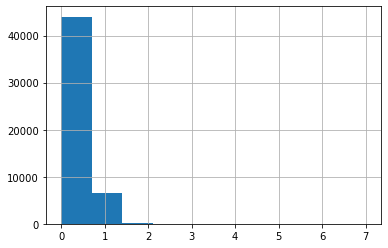

In [96]:
df.half_bath.hist()

In [97]:
df.half_bath.value_counts()

0.0    43998
1.0     6484
2.0       68
3.0        8
7.0        1
Name: half_bath, dtype: int64

In [98]:
y=[df.logerror[df.half_bath == 0.0].mean(),
df.logerror[(df.half_bath >= 1.0) & (df.half_bath < 2.0)].mean(),
df.logerror[df.half_bath >= 2.0].mean()]

In [99]:
x = ['None', 'One', 'Two of more']

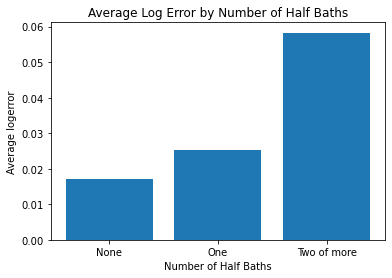

In [100]:
plt.bar(x, y)
plt.xlabel('Number of Half Baths')
plt.ylabel('Average logerror')
plt.title('Average Log Error by Number of Half Baths')
plt.show()

It appears that as the number of half baths increases, so too does the average log error.

### Null Hypothesis:
- There is no significant difference between the logerrors according to the number of half baths. 

### Alternative Hypothesis
- There is a statistically significant difference between the logerrors according to the number of half baths.

In [101]:
# I am performing an ANOVA statistical test to see the significance of this chart.
alpha = 0.05

f, p = stats.f_oneway(df[df['half_bath'] == 0.0].logerror,
                     df[(df['half_bath'] >= 1.0) & (df['half_bath'] < 2.0)].logerror,
                     df[df['half_bath'] >= 2.0].logerror)

f, p

(8.537515866678534, 0.0001962591771208839)

I reject the Null Hypothesis. 